In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Read The Data From heart.csv

In [2]:
df = pd.read_csv('data\\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Find The Features That Have Null Value

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Drop Outliers With z-score

In [4]:
z = np.abs(stats.zscore(df._get_numeric_data()))
df= df[(z < 3).all(axis=1)]

Calculate The Similarity Between Features

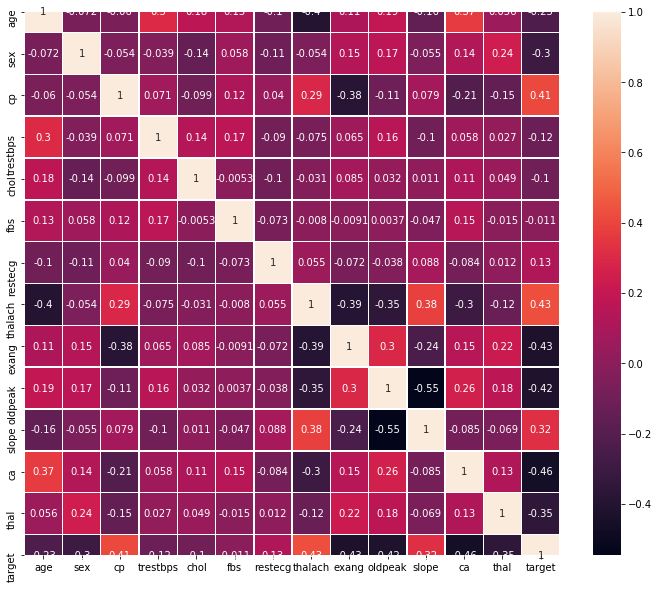

In [5]:
f1, ax1 = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.savefig('All_Features_CorrelationMatrix.png')
plt.show()

Create New Feature

In [6]:
df['age_parts'] = pd.cut(df['age'].astype(int), 4)
df['thalach_parts'] = pd.cut(df['thalach'], 4)
df['oldpeak_parts'] = pd.cut(df['oldpeak'], 4)

label = LabelEncoder()
df['age_parts'] = label.fit_transform(df['age_parts'])
df['thalach_parts'] = label.fit_transform(df['thalach_parts'])
df['oldpeak_parts'] = label.fit_transform(df['oldpeak_parts'])

df['trestbpsLog'] = np.log1p(df['trestbps'])
df['cholLog'] = np.log1p(df['chol'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,54.334495,9.093125,29.000000,47.000000,55.000000,61.000000,77.000000
sex,287.0,0.689895,0.463344,0.000000,0.000000,1.000000,1.000000,1.000000
cp,287.0,0.972125,1.037373,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,287.0,131.024390,16.991856,94.000000,120.000000,130.000000,140.000000,180.000000
chol,287.0,244.501742,45.920719,126.000000,211.000000,241.000000,274.000000,394.000000
fbs,287.0,0.142857,0.350538,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,287.0,0.533101,0.527017,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,287.0,149.804878,22.550570,88.000000,133.500000,153.000000,166.000000,202.000000
exang,287.0,0.327526,0.470131,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,287.0,1.004878,1.080684,0.000000,0.000000,0.800000,1.600000,4.400000


Normalize Data

In [7]:
x = df.values #returns a numpy array
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_parts,thalach_parts,oldpeak_parts,trestbpsLog,cholLog
0,0.708333,1.0,1.000000,0.593023,0.399254,1.0,0.0,0.543860,0.0,0.522727,0.0,0.0,0.0,1.0,0.666667,0.666667,0.666667,0.666640,0.538587
1,0.166667,1.0,0.666667,0.418605,0.462687,0.0,0.5,0.868421,0.0,0.795455,0.0,0.0,0.5,1.0,0.000000,1.000000,1.000000,0.498465,0.600394
2,0.250000,0.0,0.333333,0.418605,0.291045,0.0,0.0,0.736842,0.0,0.318182,1.0,0.0,0.5,1.0,0.000000,0.666667,0.333333,0.498465,0.421982
3,0.562500,1.0,0.333333,0.302326,0.410448,0.0,0.5,0.789474,0.0,0.181818,1.0,0.0,0.5,1.0,0.666667,1.000000,0.000000,0.375281,0.549814
4,0.583333,0.0,0.000000,0.302326,0.850746,0.0,0.5,0.657895,1.0,0.136364,1.0,0.0,0.5,1.0,0.666667,0.666667,0.000000,0.375281,0.905906
5,0.583333,1.0,0.000000,0.534884,0.246269,0.0,0.5,0.526316,0.0,0.090909,0.5,0.0,0.0,1.0,0.666667,0.666667,0.000000,0.612582,0.368823
6,0.562500,0.0,0.333333,0.534884,0.626866,0.0,0.0,0.570175,0.0,0.295455,0.5,0.0,0.5,1.0,0.666667,0.666667,0.333333,0.612582,0.742742
7,0.312500,1.0,0.333333,0.302326,0.511194,0.0,0.5,0.745614,0.0,0.000000,1.0,0.0,1.0,1.0,0.333333,0.666667,0.000000,0.375281,0.644895
8,0.479167,1.0,0.666667,0.906977,0.272388,1.0,0.5,0.649123,0.0,0.113636,1.0,0.0,1.0,1.0,0.333333,0.666667,0.000000,0.929873,0.400221
9,0.583333,1.0,0.666667,0.651163,0.156716,0.0,0.5,0.754386,0.0,0.363636,1.0,0.0,0.5,1.0,0.666667,1.000000,0.333333,0.718878,0.251795


Plot Correlation Matrix

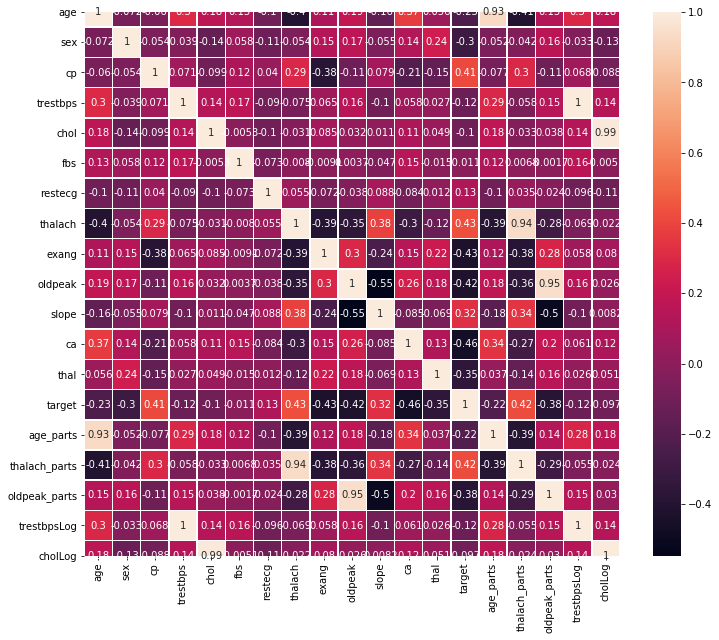

In [8]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.savefig('Features_CorrelationMatrix.png')
plt.show()

Remove Unnecessary Features

In [9]:
df = df.drop(['age', 'trestbps', 'chol', 'oldpeak', 'thalach'], axis=1)

Preparing Test And Train Data Sets

In [10]:
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

Find The Best K For KNN

In [11]:
all_train_accuracy = []
all_test_accuracy = []
k_min = [0, 1]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn.predict(x_train)
    acc_train = knn.score(x_train, y_train)
    all_train_accuracy.append(acc_train)

    knn.predict(x_test)
    acc_test = knn.score(x_test, y_test)
    all_test_accuracy.append(acc_test)
    dif_acc = abs(acc_train - acc_test)
    if dif_acc < k_min[1]:
        k_min = [i, dif_acc]
print('Best K Is:', k_min[0])

Best K Is: 46


Plot KNN Train And Test Accuracy

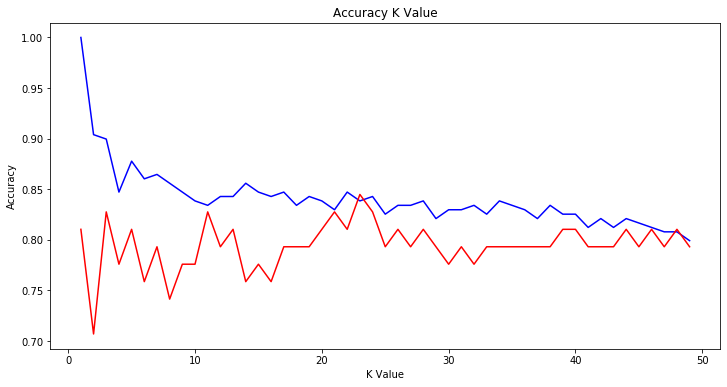

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), all_train_accuracy, color='blue')
plt.plot(range(1, 50), all_test_accuracy, color='red')
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.savefig('all_acc.png')
plt.show()

Build KNN Classifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=k_min[0])
knn.fit(x_train, y_train)
knn.predict(x_train)
acc_train_knn = knn.score(x_train, y_train)
print('Training Accuracy Is:', acc_train_knn)

knn.predict(x_test)
acc_test_knn = knn.score(x_test, y_test)
print('Test Accuracy Is:', acc_test_knn)

Training Accuracy Is: 0.8122270742358079
Test Accuracy Is: 0.8103448275862069


Build Naive Bayes Classifier

In [14]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.predict(x_train)
acc_train_gnb = gnb.score(x_train, y_train)
print('Training Accuracy Is:', acc_train_gnb)

gnb.predict(x_test)
acc_test_gnb = gnb.score(x_test, y_test)
print('Test Accuracy Is:', acc_test_gnb)

Training Accuracy Is: 0.8602620087336245
Test Accuracy Is: 0.8448275862068966
